# Исследование сервиса аренды самокатов GoFast

**Сервис аренды самокатов GoFast** передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Нужно проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 

Сервисом можно пользоваться:

**без подписки** - абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;


**с подпиской Ultra**
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st
from scipy.stats import binom, poisson
from math import factorial
from math import sqrt
import seaborn as sns



custom_datetime = lambda x: datetime.strptime(x.split('T')[0],'%Y-%m-%d')

def view(data):
    pd.set_option('display.max_columns', None)
    display(data.head().T)
    data.info()
    display(data.describe())

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Промежуточный-вывод-по-этапу" data-toc-modified-id="Промежуточный-вывод-по-этапу-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Промежуточный вывод по этапу</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-users_go-на-пропуски-и-дубликаты" data-toc-modified-id="Проверка-users_go-на-пропуски-и-дубликаты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка users_go на пропуски и дубликаты</a></span></li><li><span><a href="#Проверка-riders_go-на-пропуски-и-дубликаты" data-toc-modified-id="Проверка-riders_go-на-пропуски-и-дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка riders_go на пропуски и дубликаты</a></span></li><li><span><a href="#Проверка-subscriptions_go-на-пропуски-и-дубликаты" data-toc-modified-id="Проверка-subscriptions_go-на-пропуски-и-дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка subscriptions_go на пропуски и дубликаты</a></span></li><li><span><a href="#Промежуточный-вывод-по-этапу" data-toc-modified-id="Промежуточный-вывод-по-этапу-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Промежуточный вывод по этапу</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Частота-встречаемости-городов" data-toc-modified-id="Частота-встречаемости-городов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Частота встречаемости городов</a></span></li><li><span><a href="#Cоотношение-пользователей-с-подпиской-и-без-подписки" data-toc-modified-id="Cоотношение-пользователей-с-подпиской-и-без-подписки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cоотношение пользователей с подпиской и без подписки</a></span></li><li><span><a href="#Возраст-пользователей" data-toc-modified-id="Возраст-пользователей-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Возраст пользователей</a></span></li><li><span><a href="#Расстояние,-которое-пользователь-преодолел-за-одну-поездку" data-toc-modified-id="Расстояние,-которое-пользователь-преодолел-за-одну-поездку-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Расстояние, которое пользователь преодолел за одну поездку</a></span></li><li><span><a href="#Продолжительность-поездок" data-toc-modified-id="Продолжительность-поездок-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Продолжительность поездок</a></span></li><li><span><a href="#Промежуточный-вывод-по-этапу" data-toc-modified-id="Промежуточный-вывод-по-этапу-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Промежуточный вывод по этапу</a></span></li></ul></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных</a></span><ul class="toc-item"><li><span><a href="#Объединение-данных-о-пользователях,-поездках-и-подписках-в-один-датафрейм" data-toc-modified-id="Объединение-данных-о-пользователях,-поездках-и-подписках-в-один-датафрейм-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Объединение данных о пользователях, поездках и подписках в один датафрейм</a></span></li><li><span><a href="#Создам-ещё-два-датафрейма-дополнительных-датафрейма" data-toc-modified-id="Создам-ещё-два-датафрейма-дополнительных-датафрейма-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Создам ещё два датафрейма дополнительных датафрейма</a></span></li><li><span><a href="#Визуализация-информации-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий" data-toc-modified-id="Визуализация-информации-о-расстоянии-и-времени-поездок-для-пользователей-обеих-категорий-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий</a></span><ul class="toc-item"><li><span><a href="#Категория-пользователей-с-подпиской" data-toc-modified-id="Категория-пользователей-с-подпиской-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Категория пользователей с подпиской</a></span></li><li><span><a href="#Категория-пользователей-без-подписки" data-toc-modified-id="Категория-пользователей-без-подписки-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Категория пользователей без подписки</a></span></li></ul></li><li><span><a href="#Гистограммы-сравнения-исследуемых-параметров" data-toc-modified-id="Гистограммы-сравнения-исследуемых-параметров-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Гистограммы сравнения исследуемых параметров</a></span><ul class="toc-item"><li><span><a href="#Гистограммы-дистанций" data-toc-modified-id="Гистограммы-дистанций-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Гистограммы дистанций</a></span></li><li><span><a href="#Гистограммы-продолжительности-поездки" data-toc-modified-id="Гистограммы-продолжительности-поездки-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Гистограммы продолжительности поездки</a></span></li></ul></li><li><span><a href="#Промежуточные-выводы-по-этапу" data-toc-modified-id="Промежуточные-выводы-по-этапу-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Промежуточные выводы по этапу</a></span></li></ul></li><li><span><a href="#Подсчёт-выручки" data-toc-modified-id="Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчёт выручки</a></span><ul class="toc-item"><li><span><a href="#Cуммарное-расстояние,-количество-поездок-и-суммарное-время-для-каждого-пользователя-за-каждый-месяц" data-toc-modified-id="Cуммарное-расстояние,-количество-поездок-и-суммарное-время-для-каждого-пользователя-за-каждый-месяц-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц</a></span></li><li><span><a href="#Помесячная-выручка-по-каждому-пользователю" data-toc-modified-id="Помесячная-выручка-по-каждому-пользователю-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Помесячная выручка по каждому пользователю</a></span></li><li><span><a href="#Промежуточные-выводы-по-этапу" data-toc-modified-id="Промежуточные-выводы-по-этапу-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Промежуточные выводы по этапу</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?" data-toc-modified-id="Тратят-ли-пользователи-с-подпиской-больше-времени-на-поездки?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Тратят ли пользователи с подпиской больше времени на поездки?</a></span></li><li><span><a href="#Превышает-ли-3130-метров-среднеее-расстояние-поездки-юзера-с-подпиской?" data-toc-modified-id="Превышает-ли-3130-метров-среднеее-расстояние-поездки-юзера-с-подпиской?-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Превышает ли 3130 метров среднеее расстояние поездки юзера с подпиской?</a></span></li><li><span><a href="#Будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?" data-toc-modified-id="Будет-ли-помесячная-выручка-от-пользователей-с-подпиской-по-месяцам-выше,-чем-выручка-от-пользователей-без-подписки?-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?</a></span></li><li><span><a href="#Ответ-на-вопрос:-какой-тест-выбрать,-для-проверки-гипотез-с-количеством-обращений-в-ТП-до-и-после-обновления?" data-toc-modified-id="Ответ-на-вопрос:-какой-тест-выбрать,-для-проверки-гипотез-с-количеством-обращений-в-ТП-до-и-после-обновления?-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Ответ на вопрос: какой тест выбрать, для проверки гипотез с количеством обращений в ТП до и после обновления?</a></span></li><li><span><a href="#Промежуточный-вывод-по-этапу" data-toc-modified-id="Промежуточный-вывод-по-этапу-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Промежуточный вывод по этапу</a></span></li></ul></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span><ul class="toc-item"><li><span><a href="#Какое-минимальное-кол-во-промокодов-разослать,-чтобы-вероятность-не-выполнить-план-была-~5%?" data-toc-modified-id="Какое-минимальное-кол-во-промокодов-разослать,-чтобы-вероятность-не-выполнить-план-была-~5%?-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Какое минимальное кол-во промокодов разослать, чтобы вероятность не выполнить план была ~5%?</a></span></li><li><span><a href="#Вероятность-того,-что-push-откроют-не-более-399,5-тыс.-пользователей." data-toc-modified-id="Вероятность-того,-что-push-откроют-не-более-399,5-тыс.-пользователей.-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Вероятность того, что push откроют не более 399,5 тыс. пользователей.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка данных

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
riders_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], date_parser=custom_datetime) # привожу дату к виду pandas
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
view(users_go) # обзор данных датасета users_go

,0,1,2,3,4
user_id,1,2,3,4,5
name,Кира,Станислав,Алексей,Константин,Адель
age,22,31,20,26,28
city,Тюмень,Омск,Москва,Ростов-на-Дону,Омск
subscription_type,ultra,ultra,ultra,ultra,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [4]:
view(riders_go) # обзор данных датасета riders_go


,0,1,2,3,4
user_id,1,1,1,1,1
distance,4409.91914,2617.592153,754.159807,2694.783254,4028.687306
duration,25.599769,15.816871,6.232113,18.511,26.265803
date,2021-01-01 00:00:00,2021-01-18 00:00:00,2021-04-20 00:00:00,2021-08-11 00:00:00,2021-08-28 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [5]:
view(subscriptions_go) # обзор данных датасета subscriptions_go

,0,1
subscription_type,free,ultra
minute_price,8,6
start_ride_price,50,0
subscription_fee,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


### Описание данных

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

|     Дата сет: **users_go**   |                                        |
|-------------------|----------------------------------------|
| **user_id**           | уникальный идентификатор пользователя  |
| **name**              | имя пользователя                       |
| **age**               | возраст                                |
| **city**              | город                                  |
| **subscription_type** | тип подписки (free, ultra)             |






*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*

                              

|  Дата сет: **riders_go**|   |                                                                                                                              
| ------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **user_id**  | уникальный идентификатор пользователя 
| **distance** | <br>расстояние, которое пользователь проехал<br>в текущей сессии (в метрах)                                                                                               |
| **duration** | <br>продолжительность сессии (в минутах) — время с того момента,<br>как пользователь нажал кнопку «Начать поездку» до момента,<br>как он нажал кнопку «Завершить поездку» |
| **date**     | дата совершения поездки           

*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*


| Датасет: **subscriptions_go** |                                                   |
| ----------------------------- | ------------------------------------------------- |
| **subscription_type**         | <br>тип подписки                                      |
| **minute_price**              | стоимость одной минуты поездки по данной подписке |
| **start_ride_price**          | стоимость начала поездки                          |
| **subscription_fee**          | стоимость ежемесячного платежа                    |


*------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------*







### Промежуточный вывод по этапу

* Импортировал необходимые библиотеки и функции для работы.
<br>
* Провел обзор данных. Критичных проблем в представлении данных не выявил. 
<br>
* В этом этапе привел дату к виду pandas.
<br>
* Дал описание основных столбцов в датафреймах.

## Предобработка данных

In [6]:
riders_go['month'] = riders_go['date'].dt.month #Создам новый столбец с номером месяца на основе столбца date

In [7]:
riders_go['distance'] = riders_go['distance'].round(2) #округляю значения дистанции до двух цифр, после точки.
check_year = riders_go['date'].dt.year.copy()
check_year.unique()

array([2021])

### Проверка users_go на пропуски и дубликаты

In [8]:
#Датасет с инофрмацией о пользователях

users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропусков нет. Проверю на явные и неявные дубликаты

In [9]:
print(users_go.duplicated().sum())
duplicates_users_go = users_go[users_go.duplicated(keep=False)]

pd.set_option('display.max_rows', None)

duplicates_users_go.T #Вывод для оценки полных дублей. Т. к. данных мало, можно вывести всю таблицу.

31


,15,42,46,71,107,120,126,135,152,203,208,292,296,306,402,421,610,634,658,665,736,806,808,828,907,908,923,1044,1197,1236,1244,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564
user_id,16,43,47,72,108,121,127,136,153,204,209,293,297,307,403,422,611,635,659,666,737,807,809,829,908,909,924,1045,1198,1237,1245,293,16,909,403,908,43,127,659,204,153,1245,807,924,635,136,108,737,666,297,121,1198,72,422,611,1237,209,829,809,307,47,1045
name,Амалия,Стефания,Юрий,Никита,Влада,Алина,Павел,Марсель,Герман,Руслан,Андрей,Агата,Егор,Ясмина,Полина,Кирилл,Владимир,Герман,Злата,Зарина,Мелания,Александр,Юрий,Федор,Рустам,Константин,Мария,Артемий,Демид,Евгения,Регина,Агата,Амалия,Константин,Полина,Рустам,Стефания,Павел,Злата,Руслан,Герман,Регина,Александр,Мария,Герман,Марсель,Влада,Мелания,Зарина,Егор,Алина,Демид,Никита,Кирилл,Владимир,Евгения,Андрей,Федор,Юрий,Ясмина,Юрий,Артемий
age,27,22,28,25,29,25,25,25,23,30,23,26,33,19,19,27,28,21,27,29,27,28,26,29,30,20,23,28,29,23,27,26,27,20,19,30,22,25,27,30,23,27,28,23,21,25,29,27,29,33,25,29,25,27,28,23,23,29,26,19,28,28
city,Краснодар,Омск,Тюмень,Москва,Тюмень,Пятигорск,Пятигорск,Тюмень,Москва,Пятигорск,Омск,Краснодар,Пятигорск,Краснодар,Сочи,Сочи,Омск,Москва,Ростов-на-Дону,Москва,Ростов-на-Дону,Екатеринбург,Сочи,Пятигорск,Тюмень,Екатеринбург,Пятигорск,Ростов-на-Дону,Ростов-на-Дону,Тюмень,Пятигорск,Краснодар,Краснодар,Екатеринбург,Сочи,Тюмень,Омск,Пятигорск,Ростов-на-Дону,Пятигорск,Москва,Пятигорск,Екатеринбург,Пятигорск,Москва,Тюмень,Тюмень,Ростов-на-Дону,Москва,Пятигорск,Пятигорск,Ростов-на-Дону,Москва,Сочи,Омск,Тюмень,Омск,Пятигорск,Сочи,Краснодар,Тюмень,Ростов-на-Дону
subscription_type,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,free,free,free,free,free,free,free,free,free,free,free,ultra,ultra,free,ultra,free,ultra,ultra,ultra,ultra,ultra,free,free,free,ultra,ultra,ultra,free,ultra,ultra,ultra,free,ultra,ultra,ultra,free,ultra,free,free,ultra,ultra,free


Удаляю полные дубли в **users_go**

In [10]:
users_go = users_go.drop_duplicates()
users_go.duplicated().sum() #проверяю, что дубликаты удалены.

0

In [11]:
pd.reset_option('display.max_rows')

implicit_duplicates_users_go = users_go.duplicated(subset=['user_id','name','age','city'],keep=False)
users_go[implicit_duplicates_users_go]

,user_id,name,age,city,subscription_type


Неявных дубликатов нет в users_go, пользователи могут совпадать по всем столбцам, но если различается столбец `user_id` - значит это разные юзеры, совпавшие по остальным параметрам.

### Проверка riders_go на пропуски и дубликаты

In [12]:
print(riders_go.isna().sum()) # пропусков нет

riders_go.duplicated().sum() #явных дубликатов нет

#проводить проверку на неявные дубликаты нет смысла, т. к. в этом датасете каждая строчка - это новая сессия,
#соответственно, данные могут повторяться + данные тянутся из основного датасета.

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


0

### Проверка subscriptions_go на пропуски и дубликаты

В *subscriptions_go* нечего проверять на дубликаты и пропуски, это общая информация с тарифной сеткой.

### Промежуточный вывод по этапу

* Создал новый столбец с номером месяца на основе столбца date.
<br> 
* Для удобства чтения, округлил значения дистанции до двух цифр, после точки.
<br> 
* Устранил явные дубликаты.
<br> 
* Удостоверился, что нет пропусков.

## Исследовательский анализ данных

**Опишу и визуализирую общую информацию о пользователях и поездках**

### Частота встречаемости городов

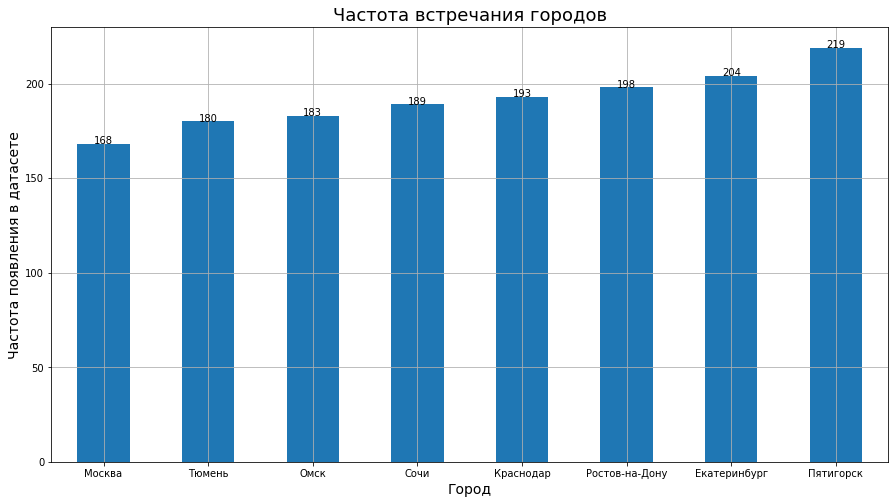

In [13]:
cityes_frequency = users_go['city'].value_counts(ascending=True)

color = ['#808080','DarkMagenta','#DDA0DD','#66CDAA','#00FA9A','#F08080',\
         '#FFC0CB','#FFA500','#FFFF00','#D2B48C'] # цвета для построения графика




ax = cityes_frequency.plot(kind='bar',
                     figsize=(15,8),
                     grid=True,
                           rot=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), 
                ha='center')   #подписываю значения над каждым столбцем
    
#Использую метод patches, который возвращает список всех столбиков диаграммы.
#Итерация по этим столбцам позволяет получить высоту и позицию х каждого столбца для добавления подписей.
#Функция annotate используется для добавления текста на график.
#Первый аргумент – это текст (в данном случае, это высота столбца, преобразованная в строку),
#второй – кортеж, указывающий положение текста. Множитель 1.005 используется для небольшого смещения,
#чтобы текст появлялся немного выше столбца.
    
    
plt.title('Частота встречания городов',fontsize=18)
plt.xlabel('Город',fontsize=14)
plt.ylabel('Частота появления в датасете',fontsize=14)
plt.show()



In [14]:
print(f'Доля присутствия городов от общего объема данных:\n\
{(cityes_frequency/cityes_frequency.sum()*100)}')

Доля присутствия городов от общего объема данных:
Москва            10.951760
Тюмень            11.734029
Омск              11.929596
Сочи              12.320730
Краснодар         12.581486
Ростов-на-Дону    12.907432
Екатеринбург      13.298566
Пятигорск         14.276402
Name: city, dtype: float64


### Cоотношение пользователей с подпиской и без подписки

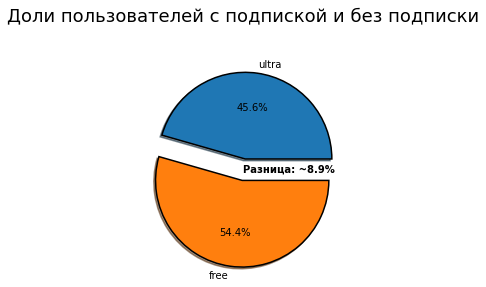

In [15]:
subs_ultra = users_go[users_go['subscription_type'] != 'free']['subscription_type'].count()
subs_free = users_go[users_go['subscription_type'] == 'free']['subscription_type'].count()

vals = [subs_ultra, subs_free]
labels = ['ultra','free']
difference = round(((vals[1]/(vals[0]+vals[1]))-(vals[0]/(vals[0]+vals[1])))*100,1)
fig, ax = plt.subplots()

ax.pie(vals,
       labels = labels,
      explode = (0.2,0.05),
      shadow=True,
      autopct='%1.1f%%',
      wedgeprops={'lw':1.5, 'ls':'-','edgecolor':'k'},
      )

ax.axis('equal')

ax.text(0, 0.05,
        f"Разница: ~{difference}%",
        weight='bold')

ax.set_title('Доли пользователей с подпиской и без подписки',
             fontsize=18,
             pad=40)

plt.show()



Доля пользователей без подписки немного больше **54%**, против доли пользователей с подпиской **46%**. Разница составила около 8.9%

### Возраст пользователей

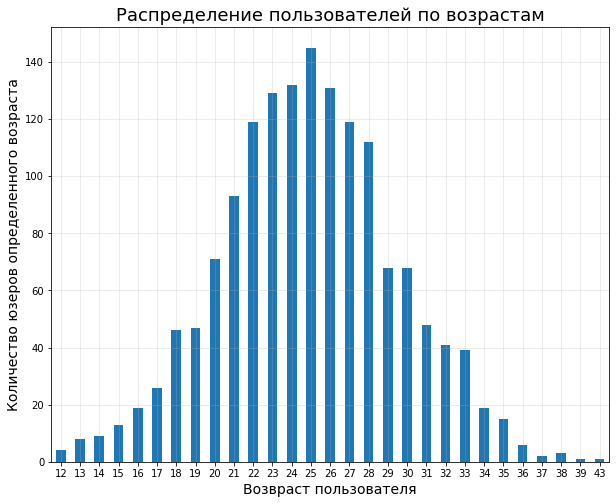

In [16]:
user_age = users_go['age'].value_counts().sort_index()

user_age.plot(kind='bar',
              figsize=(10,8),
              rot=0)

plt.grid(True,alpha=0.3)
plt.xlabel('Возвраст пользователя',fontsize=14)
plt.ylabel('Количество юзеров определенного возраста',fontsize=14)
plt.title('Распределение пользователей по возрастам',fontsize=18)
plt.show()


Больше всего встречаются пользователи в возрасте 25 лет. Чаще всего встречаются возвораст пользователя из диапазона возраста от 21 до 28 лет.

Реже по количеству пользователей в возрасте от 18 до 20 лет и от 29 до 33 лет.

Меньше всего пользователей младше 18 лет и старше 34 лет.

### Расстояние, которое пользователь преодолел за одну поездку

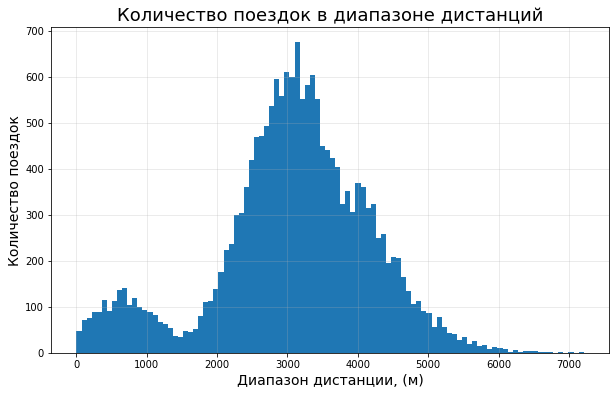

In [17]:
plt.figure(figsize=(10, 6))

riders_go['distance'].plot(kind='hist',bins=100)

plt.grid(True,alpha=0.3)

plt.xlabel('Диапазон дистанции, (м)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок в диапазоне дистанций',fontsize=18)  

plt.show()

Построив гистограмму по данным дистанций, которые проехали пользователи, видно, что график имеет нормальное распределение с двумя "холмами", поэтому стоит рассматривать два отрезка графика по отдельности, как категории "малые дистанции", "средние дистнации":

* На малых дистанциях, *от 0 до 1500 метров*, пользователи чаще всего берут самокат в аренду, чтобы проехать от 500-800 метров.

* На средних дистанциях, от 2000 до 4500 метров, пользователи чаще берут самокты в аренду от 2500 до 3500 метров.

* Поездки с более длительными дистанциями встречаеются много реже.


### Продолжительность поездок

In [18]:
duration_trip = riders_go['duration']
duration_trip

0        25.599769
1        15.816871
2         6.232113
3        18.511000
4        26.265803
           ...    
18063    19.822962
18064    21.409799
18065    18.435051
18066    16.674362
18067    15.893917
Name: duration, Length: 18068, dtype: float64

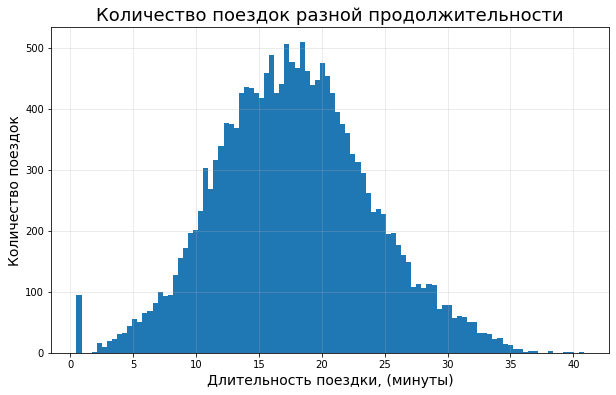

In [19]:
plt.figure(figsize=(10, 6))

riders_go['duration'].plot(kind='hist',bins=100)

plt.grid(True,alpha=0.3)

plt.xlabel('Длительность поездки, (минуты)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок разной продолжительности',fontsize=18) 

plt.show()

Данные меньше 2.5 минут встречаются достаточно редко, а поездки менее 1 минуты выглядят как аномалии. 
уберу аномальные значения меньше 1 минуты.

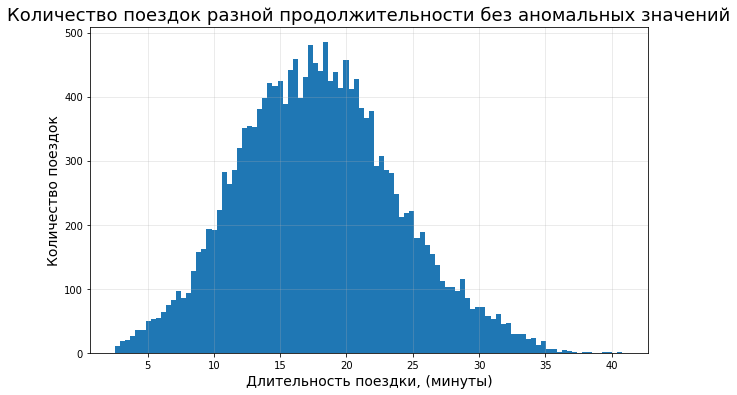

In [20]:
duration_without_anomaly = riders_go.query('duration > 2.5')

plt.figure(figsize=(10, 6))

duration_without_anomaly['duration'].plot(kind='hist',bins=100)

plt.grid(True,alpha=0.3)

plt.xlabel('Длительность поездки, (минуты)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок разной продолжительности без аномальных значений',fontsize=18) 

plt.show()

**Больше всего** поездок совершают длительностью от 10 до 25 минут.

**Реже** берут напрокат самокат длительностью 5-10 минут, 25-35 минут.

**Совсем редко** на длительность до 5 минут, 35 и более минут.

### Промежуточный вывод по этапу

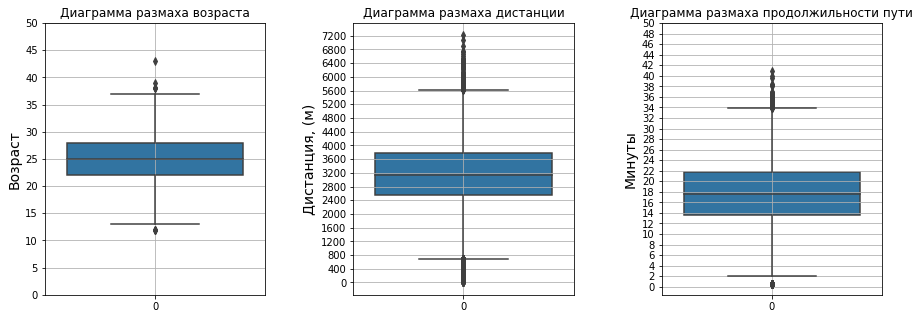

In [21]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(15, 5))

sns.boxplot(data=users_go['age'], ax=axs[0]).set_title('Диаграмма размаха возраста')
axs[0].grid(True)
axs[0].set_ylabel('Возраст',fontsize=14)

max_y0 = np.ceil(users_go['age'].max() / 10) * 10 # округляем до следующего "десятка"
axs[0].set_yticks(np.arange(0, max_y0 + 1, 5)) # устанавливаем деления оси Y

sns.boxplot(data=riders_go['distance'], ax=axs[1]).set_title('Диаграмма размаха дистанции')
axs[1].grid(True)
axs[1].set_ylabel('Дистанция, (м)',fontsize=14)

max_y1 = np.ceil(riders_go['distance'].max() / 100) * 100 # округляем до следующей "сотни"
axs[1].set_yticks(np.arange(0, max_y1 + 1, 400)) # устанавливаем деления оси Y


sns.boxplot(data=riders_go['duration'], ax=axs[2]).set_title('Диаграмма размаха продолжильности пути')
axs[2].grid(True)
axs[2].set_ylabel('Минуты',fontsize=14)

max_y2 = np.ceil(riders_go['duration'].max() / 10) * 10 # округляем до следующей "сотни"
axs[2].set_yticks(np.arange(0, max_y2 + 1, 2)) # устанавливаем деления оси Y

plt.subplots_adjust(wspace=0.4) # отступ между графиками

plt.show()

На диаграмме размаха 99% значений находятся внутри интервала, который ограничивается верхним и нижним "усами" диаграммы.

Верхний "ус" представляет собой границу сверху на диаграмме, где находятся самые большие значения, не являющиеся выбросами. Нижний "ус" - это граница снизу, где находятся наименьшие значения, не являющиеся выбросами. Выбросы, которые расположены за пределами усов, отображаются на диаграмме в виде отдельных точек или знаков. Таким образом, 99% значений находятся внутри интервала между нижним и верхним "усами" диаграммы размаха.


50% центарльных данных о возрасте равны 25 годам (разброс ± 2.5 года) - основная аудитория это люди в возрасте 25 лет, стоит обратить внимание именно на неё.
99% всех возростов сервиса находятся в пределе от 13 лет до 37 лет, остальные значений крайние редкие.

В основном дистанция, которую проезжают пользователи около 3200 метров (разброс ± 500 метров) - это центральные 50% данных о пользователях. 99% дистанций пользователь можно охарактеризовать интервалом от 700 до 5600 метров.

Так же, 18 минут - это среднее время центральных 50% данных о пользователях (с разбросом ± 4 минуты). 99% проведенного времени в пути покрывает интервал от 2 до 34 минут аренды самоката пользователем.

**Первичные рекомендации для бизнеса, которые помогут развить сервис:** обратить внимание, что большую возрастную категорию пользователей составляют люди в возрасте 25 лет (± 2.5 года).
<br> *Выставлять самокаты для аренды в местах скопления людей именно приведенного ранее возраста, это могут быть ТЦ, клубы, парки и т. п., здесь конечно стоит проводить дополнительное исследование, но установленнй ранее возраст уточняет критерии*

Люди в большей мере передвигаются на дистанции 3200 метров (± 500 метров), а проводят время в пути 18 минут (± 4 минуты). 
<br>*например, выставлять самокаты в такой локации, где люди захотят проехать расстояние в перделах выведенных дистанциях и времени поездки, к примеру, от универститетов, до ближайших ТЦ и т. п.*


Все графики имеют нормальный характер распределения, часто встречаются среднее значение и близкие к нему, а крайние значения встречаются редко.

Частота встречаемости городов:

<br> Различие в доле присутствия городов небольшое, составляет ~ от 1 до 3.5%. Такую разницу можно считать несущественной. Можно сказать, что данные представленны в сравнтиельно одинаковом объеме. 

<br>
Подписка/без подписки:
<br>
* Доля пользователей без подписки немного больше 54%, против доли пользователей с подпиской 46% (разница 8.8%)


## Объединение данных

### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [22]:
print(f'количество строк в riders_go до объединения: {len(riders_go)}\n\
количество пропусков до объяединения:\n{riders_go.isna().sum()}')

print()
print()

print(f'количество строк в riders_go до объединения: {len(users_go)}\n\
количество пропусков до объяединения:\n{users_go.isna().sum()}')

merge_df = riders_go.merge(users_go,on='user_id',how='left')
merge_df.head(15)




количество строк в riders_go до объединения: 18068
количество пропусков до объяединения:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64


количество строк в riders_go до объединения: 1534
количество пропусков до объяединения:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4409.92,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,2617.59,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.16,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,2694.78,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,4028.69,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra
5,1,2770.89,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra
6,1,3039.02,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra
7,1,2842.12,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra
8,1,3412.69,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra
9,1,748.69,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra


In [23]:
print(f'количество строк в merge_df после объединения: {len(merge_df)}\n\
количество пропусков после объяединения:\n{merge_df.isna().sum()}')

количество строк в merge_df после объединения: 18068
количество пропусков после объяединения:
user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


Оценил количесвто строк и пропуск в датафреймах riders_go и users_go до объединения и оценил уже теже параметры в объединенном датафрейме merge_df. После объединения строки не потеряли и пропусков не добавилось.

### Создам ещё два датафрейма дополнительных датафрейма

In [24]:
#c данными о пользователях без подписки;
#с данными о пользователях с подпиской.

print(f'количество строк в merge_df.subscription_type до разделения: {len(merge_df.subscription_type)}\n\
количество пропусков до разделения:{merge_df.subscription_type.isna().sum()}')

with_subs = merge_df[merge_df['subscription_type'] != 'free']
free_subs = merge_df[merge_df['subscription_type'] == 'free']

print()
print()


if (len(with_subs.subscription_type) + len(free_subs.subscription_type)) == len(merge_df.subscription_type):
    print('Суммарное количество строк совпадает после разъединения')
else:
    print('Не совпадает суммарное количество строк после разъединения, потеряли данные')
    
if (with_subs.subscription_type.isna().sum()+free_subs.subscription_type.isna().sum()) == 0:
    print('Пропусков нет')
else:
    print('Появились пропуски')

        

количество строк в merge_df.subscription_type до разделения: 18068
количество пропусков до разделения:0


Суммарное количество строк совпадает после разъединения
Пропусков нет


Провереки размерности строк и наличия пропусков, показала, что после разъединения датафреймов по фильтру, мы не теряем данные и не появляются пропуски.

**Датафреймы** `with_subs` и `free_subs` содержат записи о каждой поездки. То есть, здесь все поездки пользователя с конкретным ID.

### Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий

#### Категория пользователей с подпиской

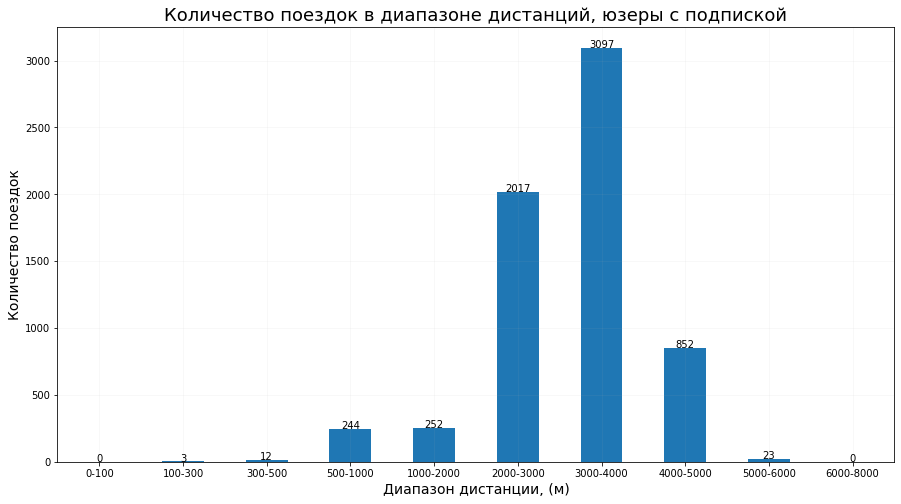

In [25]:
with_sub_dist_trip = with_subs['distance']
def distance_category_with_sub(x,lower,upper): # x-порядковый номер переменной с count, lower - нижний порог для фильтра,
                                    # upper верхний порог для фильтра
        
    xx = with_sub_dist_trip[(with_sub_dist_trip >=lower)&(with_sub_dist_trip <=upper)].count() #фильтрую по диапазону
    return xx.item() #переводу из np.int64, в обычный int
    

dist_lower_sub = [0,100,300,500,1000,2000,3000,4000,5000,6000]         #cписок нижних порогов
dist_upper_sub = [100,300,500,1000,2000,3000,4000,5000,6000,8000]      # список верхних порогов
dist_name_sub = ['0-100','100-300','300-500','500-1000','1000-2000',
             '2000-3000','3000-4000','4000-5000','5000-6000','6000-8000'] #имена индексов


with_sub_series_distanse = pd.Series([],dtype='int')

for name,lower,upper in zip(dist_name_sub,dist_lower_sub,dist_upper_sub):
    with_sub_series_distanse = with_sub_series_distanse.append(pd.Series([distance_category_with_sub(name,lower,upper)],
                                                                         index=[name]))
    
ax = with_sub_series_distanse.plot(kind='bar',rot=0,figsize=(15,8))

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), 
                ha='center')

plt.xlabel('Диапазон дистанции, (м)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок в диапазоне дистанций, юзеры с подпиской',fontsize=18)    
plt.grid(True,alpha=0.1)    
plt.show()

Пользователи с подпиской **чаще** ездят на дистанции от 2000 метров до 4000 метров.

**Реже** от 4000-5000 метров.

Остальные дистанции встречаются **совсем редко**.

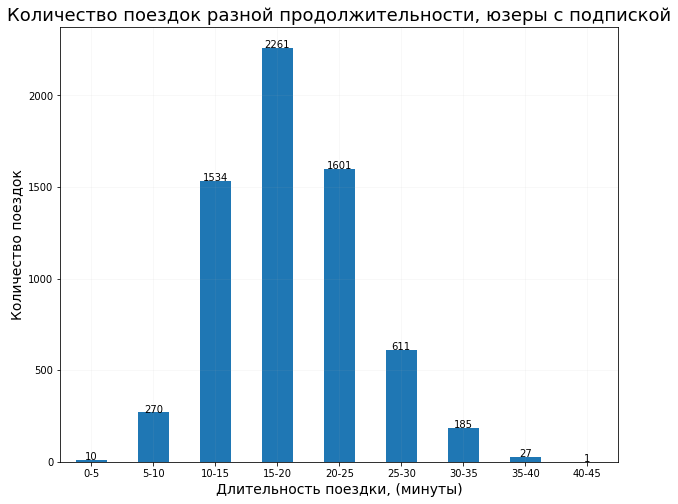

In [26]:
with_sub_dur_trip = with_subs['duration']

def duration_category_with_sub(x,lower,upper): # x-порядковый номер переменной с count, lower - нижний порог для фильтра,
                                    # upper верхний порог для фильтра
        
    xx = with_sub_dur_trip[(with_sub_dur_trip >=lower)&(with_sub_dur_trip <=upper)].count() #фильтрую по диапазону
    return xx.item() #переводу из np.int64, в обычный int
    
dist_lower_dur_sub = 0 # нижний порог
dist_upper_dur_sub = 5 # верхний порог
dist_name_dur_sub = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'] #имена индексов


with_sub_series_duration = pd.Series([],dtype='int')

for name in dist_name_dur_sub:
    with_sub_series_duration = with_sub_series_duration.append(pd.Series([duration_category_with_sub(name,
                                                                        dist_lower_dur_sub,
                                                                        dist_upper_dur_sub)],
                                                                         index=[name]))
    if dist_lower_dur_sub < 40:
        dist_lower_dur_sub +=5
        dist_upper_dur_sub +=5

ax = with_sub_series_duration.plot(kind='bar',
                    rot=0,
                    figsize=(10,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), 
                ha='center')

plt.xlabel('Длительность поездки, (минуты)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок разной продолжительности, юзеры с подпиской',fontsize=18)    
plt.grid(True,alpha=0.1) 
plt.show()

Пользователи с подпиской **чаще** проводят от 10 до 25 минут в дороге. 

**Реже** от 5 до 10 минут, а также от 25 до 35 минут.

Остальные случаи встречаются **совсем редко**.

#### Категория пользователей без подписки

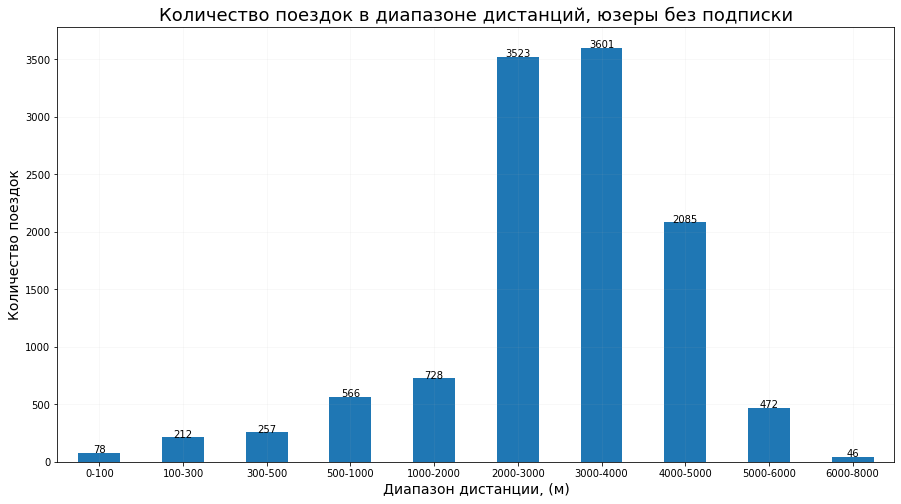

In [27]:
free_sub_dist_trip = free_subs['distance']
def distance_category_free_sub(x,lower,upper): # x-порядковый номер переменной с count, lower - нижний порог для фильтра,
                                    # upper верхний порог для фильтра
        
    xx = free_sub_dist_trip[(free_sub_dist_trip >=lower)&(free_sub_dist_trip <=upper)].count() #фильтрую по диапазону
    return xx.item() #переводу из np.int64, в обычный int
    

dist_lower_free = [0,100,300,500,1000,2000,3000,4000,5000,6000]         #cписок нижних порогов
dist_upper_free = [100,300,500,1000,2000,3000,4000,5000,6000,8000]      # список верхних порогов
dist_name_free = ['0-100','100-300','300-500','500-1000','1000-2000',
             '2000-3000','3000-4000','4000-5000','5000-6000','6000-8000'] #имена индексов


free_sub_series_distanse = pd.Series([],dtype='int')

for name,lower,upper in zip(dist_name_free,dist_lower_free,dist_upper_free):
    free_sub_series_distanse = free_sub_series_distanse.append(pd.Series([distance_category_free_sub(name,lower,upper)],
                                                                         index=[name]))
    
ax = free_sub_series_distanse.plot(kind='bar',rot=0,figsize=(15,8))

for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), 
                ha='center')

plt.xlabel('Диапазон дистанции, (м)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок в диапазоне дистанций, юзеры без подписки',fontsize=18)    
plt.grid(True,alpha=0.1)    
plt.show()

Пользователи без подписки **чаще** ездят на дистанции от 2000 метров до 4000 метров.

**Реже** от 4000-5000 метров.

Остальные дистанции встречаются **совсем редко**.

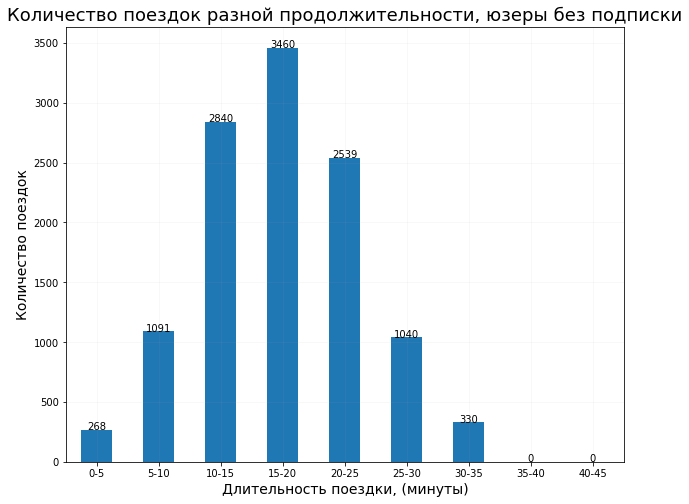

In [28]:
free_sub_dur_trip = free_subs['duration']

def duration_category_free_sub(x,lower,upper): # x-порядковый номер переменной с count, lower - нижний порог для фильтра,
                                    # upper верхний порог для фильтра
        
    xx = free_sub_dur_trip[(free_sub_dur_trip >=lower)&(free_sub_dur_trip <=upper)].count() #фильтрую по диапазону
    return xx.item() #переводу из np.int64, в обычный int
    
dist_lower_dur_free = 0 # нижний порог
dist_upper_dur_free = 5 # верхний порог
dist_name_dur_free = ['0-5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','40-45'] #имена индексов


free_sub_series_duration = pd.Series([],dtype='int')

for name in dist_name_dur_free:
    free_sub_series_duration = free_sub_series_duration.append(pd.Series([duration_category_free_sub(name,
                                                                        dist_lower_dur_free,
                                                                        dist_upper_dur_free)],
                                                                         index=[name]))
    if dist_lower_dur_free < 40:
        dist_lower_dur_free +=5
        dist_upper_dur_free +=5

ax = free_sub_series_duration.plot(kind='bar',
                    rot=0,
                    figsize=(10,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()), 
                ha='center')

plt.xlabel('Длительность поездки, (минуты)',fontsize=14)
plt.ylabel('Количество поездок',fontsize=14)
plt.title('Количество поездок разной продолжительности, юзеры без подписки',fontsize=18)    
plt.grid(True,alpha=0.1) 
plt.show()

Пользователи без подписки **чаще** проводят от 10 до 25 минут в дороге. 

**Реже** от 5 до 10 минут, а также от 25 до 35 минут.

Остальные случаи встречаются **совсем редко**.

### Гистограммы сравнения исследуемых параметров

#### Гистограммы дистанций

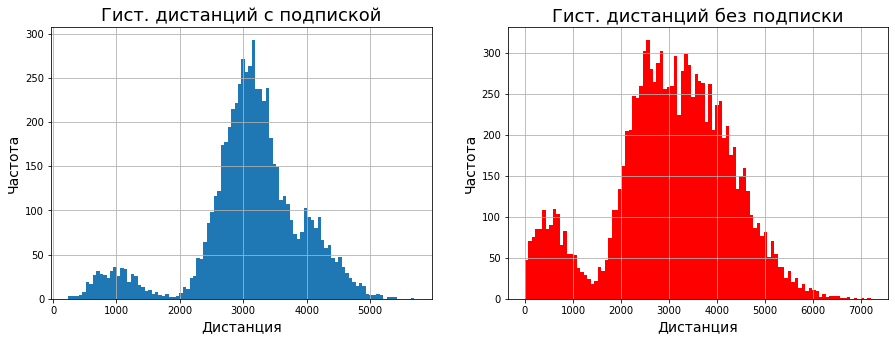

Статистики по "дистанции" с подпиской: 

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

Статистики по "дистанции" без подписки: 

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64


In [29]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10, 8))

with_subs['distance'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs[0]).set_title('Гист. дистанций с подпиской',fontsize=18)

axs[0].grid(True)
axs[0].set_xlabel('Дистанция',fontsize=14)
axs[0].set_ylabel('Частота',fontsize=14)



free_subs['distance'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs[1],
                          color = 'r').set_title('Гист. дистанций без подписки',fontsize=18)

axs[1].grid(True)
axs[1].set_xlabel('Дистанция',fontsize=14)
axs[1].set_ylabel('Частота',fontsize=14)

plt.show()

print(f'Статистики по "дистанции" с подпиской: \n\n\
{with_subs.distance.describe()}')
print()
print(f'Статистики по "дистанции" без подписки: \n\n\
{free_subs.distance.describe()}')

У пользователей с попдиской более частый инетрвал дистанций "у́же" по своему распределению, чем у пользователей без попдиски, это от 2500 до 3500 метров *(с подпиской)* и от 2000 до 4500 метров соответственно *без подписки*.

Наиболее часто встречается дистанция 3500 метров у пользователей с подпиской.

Без подписки у пользователей чаще встречается 2500 метров. 

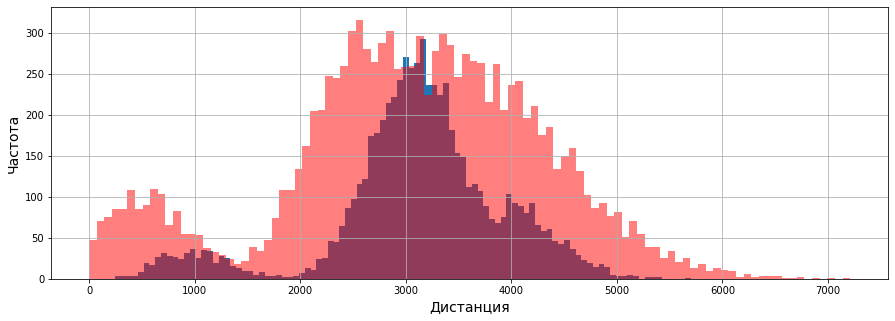

Статистики по "дистанции" с подпиской: 

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

Статистики по "дистанции" без подписки: 

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64


In [30]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(14, 5))

with_subs['distance'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs)

free_subs['distance'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs,
                           alpha=0.5,
                          color = 'r')

axs.grid(True)
axs.set_xlabel('Дистанция',fontsize=14)
axs.set_ylabel('Частота',fontsize=14)

plt.show()

print(f'Статистики по "дистанции" с подпиской: \n\n\
{with_subs.distance.describe()}')
print()
print(f'Статистики по "дистанции" без подписки: \n\n\
{free_subs.distance.describe()}')

#### Гистограммы продолжительности поездки

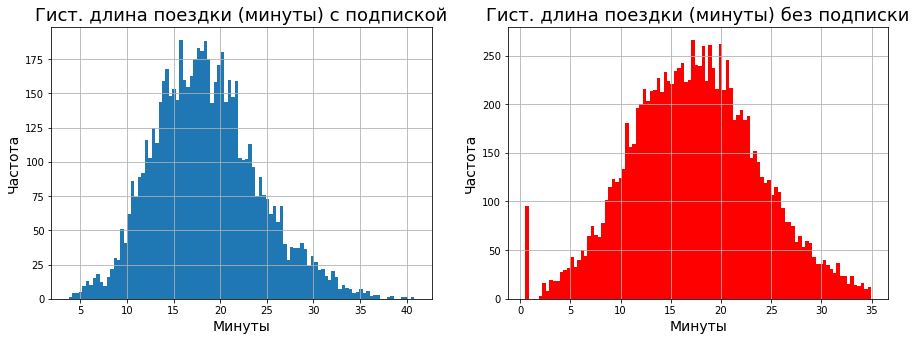

Статистики по "минутам" с подпиской: 

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

Статистики по "минутам" без подписки: 

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

Процент аномальных значений с продолжительностью поездки = 0.5 минуты:0.82%


In [31]:
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10, 8))

with_subs['duration'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs[0]).set_title('Гист. длина поездки (минуты) с подпиской',fontsize=18)

axs[0].grid(True)
axs[0].set_xlabel('Минуты',fontsize=14)
axs[0].set_ylabel('Частота',fontsize=14)



free_subs['duration'].plot(kind='hist',
                           rot=0,
                           figsize=(15,5),
                           bins=(100),
                           ax=axs[1],
                          color = 'r').set_title('Гист. длина поездки (минуты) без подписки',fontsize=18)

axs[1].grid(True)
axs[1].set_xlabel('Минуты',fontsize=14)
axs[1].set_ylabel('Частота',fontsize=14)

plt.show()

print(f'Статистики по "минутам" с подпиской: \n\n\
{with_subs.duration.describe()}')
print()
print(f'Статистики по "минутам" без подписки: \n\n\
{free_subs.duration.describe()}')

checz = free_subs.query('duration <2').copy()

print()
print(f'Процент аномальных значений с продолжительностью поездки = 0.5 минуты:\
{round((len(checz.duration)/len(free_subs.duration))*100,2)}%')

По результатам статистик и гистограмм можно сделать выводы о том, что пользователи с подпиской всегда немного больше времени берут в аренду самокат: минимальные значения с подпиской 4 минуты, против 2 минут без подписки *(отбросив аномальные значения в 0.5 мин.)*, медианные значения минут в пути с подпиской 18, а без подписки 17 минут, и даже максимальное время в пути у пользователей с подпиской снова выше 40 минут, против 35 минут без подписки.

В данных без подписки сущетсвует аномальный выброс с продолжительностью поездки 0.5 минуты, таких знаяений <1% от всех данных продолжительности поездки у пользователей без подписки.
Можно обратить внимание на это и узнать, возможно была какая-то акция, когда пользователи без подписки могли поехать первые 30 секунд бесплатно, а далее начиналась тарификация. Чтобы разобраться в природе возникновения таких значений, стоит уточнить, что еще могло повлиять на получение такой длительности поездки.  

Т. к. Аномальных данных <1%, медиана покроет достаточно хорошо все эти отклонения и по результам гистограммы и статистик можно делать выводы.

### Промежуточные выводы по этапу

* Объединенил данные о пользователях, поездках и подписках в один датафрейм.
<br>
<br>
* Разделил пользователей с подпиской и без подписки в два разных датафрейма, на основе датафрейма описанного выше.
<br>
<br>
* Визуализировал информацию о расстоянии и времени поездок для пользователей обеих категорий, на основании этого, можно сделать следующие выводы:
<br>

Наиболее часто встречается дистанция 3500 метров у пользователей с подпиской
<br>Без подписки у пользователей чаще встречается 2500 метров.

<br>
По результатам статистик и гистограмм можно сделать выводы о том, что пользователи с подпиской всегда немного больше времени берут в аренду самокат: минимальные значения с подпиской 4 минуты, против 2 минут без подписки (отбросив аномальные значения в 0.5 мин.), медианные значения минут в пути с подпиской 18, а без подписки 17 минут, и даже максимальное время в пути у пользователей с подпиской снова выше 40 минут, против 35 минут без подписки.


## Подсчёт выручки

### Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [32]:
merge_df.duration = np.ceil(merge_df.duration).astype(int) # округляю в исх. ДФ минуты до следующего целого числа.

merge_df_agg = merge_df.pivot_table(index=['user_id','month','subscription_type'],
                                    values=['distance','duration','date'],
                                    aggfunc={'distance':'sum','duration':'sum','date':'count'})


merge_df_agg = merge_df_agg.rename(columns={'date':'count_trip'})

display(subscriptions_go)

merge_df_agg.reset_index(inplace=True) #сбрасываю индексы, чтобы проще обращаться к столбцам было

merge_df_agg.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,user_id,month,subscription_type,count_trip,distance,duration
0,1,1,ultra,2,7027.51,42
1,1,4,ultra,1,754.16,7
2,1,8,ultra,2,6723.47,46
3,1,10,ultra,2,5809.91,32
4,1,11,ultra,3,7003.50,56


In [33]:
print(f'Пропусков в агрегированных данных:\n\
{merge_df_agg.isna().sum()}')

Пропусков в агрегированных данных:
user_id              0
month                0
subscription_type    0
count_trip           0
distance             0
duration             0
dtype: int64


Проведена проверка на пропуски, после созданиях агрегированных данных в merge_df_agg. Пропусков нет. 

### Помесячная выручка по каждому пользователю

In [34]:
def monthly_revenue(df):
    return df['start_ride_price'] * df['count_trip'] + df['minute_price'] * df['duration'] + df['subscription_fee']


merge_df_agg = merge_df_agg.merge(subscriptions_go, on='subscription_type',how='left')

merge_df_agg['monthly_revenue'] = merge_df_agg.apply(monthly_revenue, axis=1)
merge_df_agg

,user_id,month,subscription_type,count_trip,distance,duration,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,1,ultra,2,7027.51,42,6,0,199,451
1,1,4,ultra,1,754.16,7,6,0,199,241
2,1,8,ultra,2,6723.47,46,6,0,199,475
3,1,10,ultra,2,5809.91,32,6,0,199,391
4,1,11,ultra,3,7003.50,56,6,0,199,535
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,free,2,3409.47,26,8,50,0,308
11327,1534,8,free,2,7622.45,48,8,50,0,484
11328,1534,9,free,1,4928.17,23,8,50,0,234
11329,1534,11,free,4,13350.02,78,8,50,0,824


### Промежуточные выводы по этапу

Подготовил датафрейм, который показывает по каждому пользователю его тип подписки, количество поездок, дистанцию и время за каждый месяц. На основании этих данных помесячно считается прибыль. Этот датафрейм пригодится для следующего этапа - проверки гипотез.

In [35]:
merge_df_agg['monthly_revenue'].sum()

3878641

## Проверка гипотез

### Тратят ли пользователи с подпиской больше времени на поездки?

In [36]:
print('Средняя продолжительность поездки с подпиской:',with_subs['duration'].mean())
print()
print('Средняя продолжительность поездки без подписки:', free_subs['duration'].mean())

Средняя продолжительность поездки с подпиской: 18.54198516280583

Средняя продолжительность поездки без подписки: 17.39090929866399


Проведу проверку гипотезы о равенстве средних двух генеральных совокупностей. Нулевая гипотеза (H0) звучит так: средняя продолжительность поездки пользователей с подпиской и без подписки равная. Альтернативная гипотеза (H1): Среднее время поездки у пользователей с подпиской больше.

In [37]:
alpha = 0.05

results = st.ttest_ind(with_subs['duration'],
                        free_subs['duration'],
                       alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

Вероятность того, что длительность поездки у пользователей с подпиской и без подписки равная - крайне маленькая.

В результате теста, в ходе которого проверял равенство средних двух генеральных совокупностей, значение p-value = (1.2804098316645618e-34) оказалось много меньше уровня стат. значимости (0.05), что говорит о том, что вероятность получить равную среднюю продолжительность поездки с наличием и без подпски крайне мала.

С точки зрения бизнеса, вероятно, пользователи с подпиской будут больше времени тратить на поездки.

In [38]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


### Превышает ли 3130 метров среднеее расстояние поездки юзера с подпиской?

In [39]:
print('Среднее расстояние поездки с подпиской:', with_subs['distance'].mean())

Среднее расстояние поездки с подпиской: 3115.445430769231


Проверю односторонню гипозету относительно среднего расстояния поездки пользователей с подпиской.


H0: средняя дистанция поездки с подпиской = 3130 метрам.


H1: средняя дистанция поездки с подпиской > 3130 метров.

In [40]:
mean_distance_sub = 3130

alpha = 0.05

results = st.ttest_1samp(
    with_subs['distance'], 
    mean_distance_sub,
      alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы.

В результате одностороннего теста, p-value (вероятность значения) составила ~ 92%, p-value – это «жизнеспособность» нулевой гипотезы, которую мы оцениваем по имеющимся данным. В контексте текущей проверки, на языке статистики p-значение:  0.9195362605842414 говорит о том, что нет оснований отвергать нулевую гипотезу.
Следовательно, вероятные значения расстояния поездки пользователей с подпиской вероятно не будут превышать 3130 метров (оптимального расстояния с точки зрения износа самоката)

С точки зрения бизнеса, вероятно пользователи с подпиской не будут проезжать расстояние больше 3130 метров, а следовательно у самокатов будет оптимальныый уровень износа.


### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

In [41]:
ultra_revenue_for_month = merge_df_agg[merge_df_agg['subscription_type'] == 'ultra']
free_revenue_for_month = merge_df_agg[merge_df_agg['subscription_type'] == 'free']

print('Средняя выручка по месяцам у пользователей с подпиской:', ultra_revenue_for_month['monthly_revenue'].mean())
print('')
print('Средняя выручка по месяцам у пользователей без подписки:', free_revenue_for_month['monthly_revenue'].mean())

Средняя выручка по месяцам у пользователей с подпиской: 362.7921906022502

Средняя выручка по месяцам у пользователей без подписки: 328.6413651073845


Проверю одностороннюю гипотезу.

H0: выручка по месяцам пользователей с подпиской и без подписки равная.

H1: выручка пользователей по месяцам с подпиской выше, чем без подписки.

In [42]:
alhpa = 0.05

results = st.ttest_ind(ultra_revenue_for_month['monthly_revenue'],
                         free_revenue_for_month['monthly_revenue'],
                      alternative='greater')
                       

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 


p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


В результате теста, нулевая гипотеза отвернута в пользу альтернативной гипотезы - вероятно выручка пользователей по месяцам с подпиской будет выше, чем без подписки.

На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы.

В результате одностороннего теста, p-value (вероятность значения) составила = 1.8850394384715216e-31, p-value – это «жизнеспособность» нулевой гипотезы, которую мы оцениваем по имеющимся данным. В контексте текущей проверки, на языке статистики p-значение: 1.8850394384715216e-31 говорит о том, что есть основания отвергать нулевую гипотезу.

С точки зрения бизнеса это означает, что вероятно пользователи с подпиской приносят больше месячную вырочку, чем без неё.

### Ответ на вопрос: какой тест выбрать, для проверки гипотез с количеством обращений в ТП до и после обновления?

*Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение.
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось.
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.
Какой тест вам понадобился бы для проверки этой гипотезы?*

В описанном выше случаи, правильно будет применять тест о равенстве средних для зависимых (парных) выборок.

Метод scipy.stats.ttest_rel()

Гипотезы будут сформулированы так:

H0: mu1 = mu2, где mu1 и mu2 - средние значения до и после изменения/

H1: mu1 != mu2, проверять буду одностронню гипотезу (левую) - стало ли обращений меньше, после обновлений.


Таким образом смогу проверить гипотезу о изменении количества обращений в тех. поддержку до и после обновлений. То есть, обращения либо останутся на прежнем уровне, либо их стало меньше.

### Промежуточный вывод по этапу

Были проверены поставленные гипотезы и сделаны следующие выводы:

* Средняя продолжительность поездки у пользователей с подпиской выше, чем без подписки.

* Вероятные значения расстояния поездки пользователей с подпиской не будут превышать 3130 метров (оптимального расстояния с точки зрения износа самоката)

* Выручка пользователей по месяцам с подпиской будет выше, чем без подписки.

## Распределения

### Какое минимальное кол-во промокодов разослать, чтобы вероятность не выполнить план была ~5%?

 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки,
 в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия
 подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 
 Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 %
 пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была
 примерно 5 %.
 Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения
 и сформулируйте ответ на вопрос о количестве промокодов.
 
**Параметры биномиального распределения:**

**n:** количество экспериментов (разосланных промокодов)

**p:** вероятность успеха (продления подписки)

**k:** количество успехов (количество клиентов, продливших подписку)

Нужно найти минимальное значение n, при котором вероятность не выполнить план (то есть количество клиентов, продливших подписку, будет меньше 100) составит примерно 5%.
Это означает, что необходимо найти такое значение n, при котором P(k < 100) ≈ 0.05.
Для решения этой задачи использую кумулятивную функцию распределения биномиального распределения, обозначаемую как F(k; n, p), которая дает вероятность того, что значение случайной величины X (количество клиентов,
продливших подписку) будет меньше или равно k.

*Кумулятивная функция распределения биномиального распределения позволяет нам вычислить вероятность получить не более определенного числа успехов в серии испытаний, учитывая вероятность успеха и общее количество испытаний.*

Минимальное количество промокодов, которое нужно разослать: 1172


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


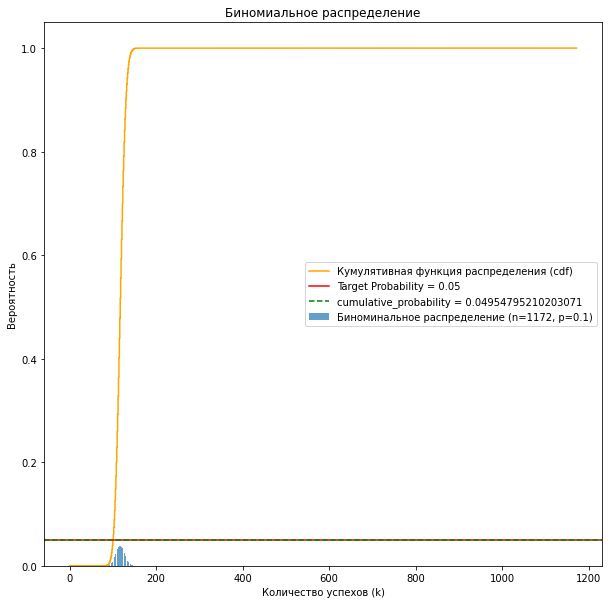

In [43]:
def find_minimum_promo_codes(p, target_probability):
    n = 1
    while True:
        cumulative_probability = st.binom.cdf(100, n, p) # вероятность невыполнить план
        if cumulative_probability <= target_probability: # Сравниваем полученную вероятность невыполнить план с целевой
                                                        # если cumulative_probability <= target_probability, тогда n+=1
            return n
        else:
            n += 1

p = 0.1
target_probability = 0.05
minimum_promo_codes = find_minimum_promo_codes(p, target_probability)

print(f"Минимальное количество промокодов, которое нужно разослать: {minimum_promo_codes}")

n = minimum_promo_codes

x = np.arange(0, n + 1) #Переменная x используется для создания массива значений по оси x (горизонтальной оси) на графике.
#В данном случае, x содержит значения от 0 до n представляет возможные значения случайной величины в биномиальном распределении.


pmf_values = st.binom.pmf(x, n, p) # x = np.arange(0, n + 1); n=minimum_promo_codes (1172) 

#Переменная pmf_values используется для хранения вероятностей массовой функции распределения (PMF)
#для соответствующих значений из x. В данном контексте, она содержит вероятности для каждого значения случайной величины x
#в биномиальном распределении с параметрами n и p.

#по простому x - значения по оси абсцис (x), а pmf_values - значения вероятностей по y (оси ординат)

cumulative_probability = st.binom.cdf(100, 1172, 0.1) # вероятность невыполнить план


plt.figure(figsize=(10,10))
# График биномиального распределения
plt.bar(x, pmf_values, label=f'Биноминальное распределение (n={n}, p={p})', alpha=0.7)
plt.xlabel('Количество успехов (k)')
plt.ylabel('Вероятность')
plt.title('Биномиальное распределение')

# График кумулятивной функции распределения
cumulative_values = st.binom.cdf(x, n, p)
plt.step(x, cumulative_values, where='post', label='Кумулятивная функция распределения (cdf)', color='orange')

# Помечу точку, соответствующую target_probability
plt.axhline(y=target_probability, color='red', linestyle='-', label=f'Target Probability = {target_probability}')

# Помечу по y линию, соответствующую cumulative_probability - то есть вероятности не выполнить план, разослав 1172 промокода
plt.axhline(y=cumulative_probability, color='green', linestyle='--', label=f'cumulative_probability = {cumulative_probability}')
plt.legend()
plt.show()


Необходимо разослать минимум 1172 промокодов, чтобы получить 100 успехов, а вероятность не выполнить план составляла ~5 %. На получившемся графике распределения вероятность не выполнить план 0.04954795210203071 ~ 4.95%

### Вероятность того, что push откроют не более 399,5 тыс. пользователей.

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [44]:
# Дано:
n = 1000000  # Общее количество уведомлений
p = 0.4  # Вероятность открытия уведомления
x = 399500  # Пороговое значение

# Создаем биномиальное распределение
rv = binom(n, p)

# Оценка вероятности того, что уведомление откроют не более 399,5 тыс. пользователей
probability = rv.cdf(x)  # Функция распределения


print(f"Вероятность, что не более {x} пользователей откроют уведомление: {round((probability)*100,2)}%")

Вероятность, что не более 399500 пользователей откроют уведомление: 15.4%


## Общий вывод

Исходя из представленных данных, можно сделать следующие наблюдения:

Различие в доле присутствия городов небольшое, составляет ~ от 1 до 3.5%. Такую разницу можно считать несущественной.

Доля пользователей без подписки составляет немного более 54%, в то время как доля пользователей с подпиской составляет 46%. Доля пользователей без подписки превышает долю пользователей с подпиской на 8%.

<br>Большую возрастную категорию пользователей составляют люди в возрасте 25 лет (± 2.5 года).
Стоит выставлять самокаты для аренды в местах скопления людей именно приведенного ранее возраста, это могут быть ТЦ, клубы, парки и т. п., здесь,конечно, стоит проводить дополнительное исследование, но установленнй ранее возраст уточняет критерии

Люди часто передвигаются на дистанции 3200 метров (± 500 метров), а проводят время в пути 18 минут (± 4 минуты).
Например, можно попробовать выставлять самокаты в такой локации, где люди захотят проехать расстояние в перделах выведенных дистанциях и времени поездки, к примеру, от универститетов, до ближайших ТЦ и т. п.

У пользователей с попдиской более частый инетрвал дистанций "у́же" по своему распределению, чем у пользователей без попдиски, это от 2500 до 3500 метров (с подпиской) и от 2000 до 4500 метров соответственно без подписки.

Наиболее часто встречается дистанция 3500 метров у пользователей с подпиской.

Без подписки у пользователей чаще встречается 2500 метров.

По результатам статистик и гистограмм можно сделать выводы о том, что пользователи с подпиской всегда немного больше времени берут в аренду самокат: минимальные значения с подпиской 4 минуты, против 2 минут без подписки (отбросив аномальные значения в 0.5 мин.), медианные значения минут в пути с подпиской 18, а без подписки 17 минут, и даже максимальное время в пути у пользователей с подпиской снова выше 40 минут, против 35 минут без подписки.

С точки зрения бизнеса, вероятно, пользователи с подпиской будут больше времени тратить на поездки.

С точки зрения бизнеса, вероятно пользователи с подпиской не будут проезжать расстояние больше 3130 метров, а следовательно у самокатов будет оптимальныый уровень износа.

С точки зрения бизнеса это означает, что вероятно пользователи с подпиской приносят больше месячную вырочку, чем без неё.



Предлагаемые действия: Рекомендуется разослать не менее 1172 промокода, чтобы убедить 100 активных пользователей продлить подписку, вероятность не выполнить план при этом ~5%. Чтобы убедить продлить подиску уже 130 пользователей, промокодов нужно 1494, вероятность не выполнить план останется прежней ~5%.

Если разослать 1 млн. push-уведомлений, то вероятность, что не более 399500 пользователей откроют уведомление: 15.4%

Анализ этих данных может быть полезным при принятии решений, связанных с продвижением и поощрением пользователей мобильного приложения.